<a href="https://colab.research.google.com/github/joshimohitm9/Projects/blob/main/2)_KNN_IRIS_FLOWER_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# basic project number 2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score


In [ ]:
iris=load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
df_iris=pd.DataFrame(iris.data,columns=iris.feature_names)
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
target=pd.DataFrame(iris.target,columns=["target"])
target

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [ ]:
target_name=[iris.target_names[iris.target[i]] for i in range(len(target))]

In [ ]:
target_name=pd.DataFrame(target_name,columns=["target_name"])
df=pd.concat([df_iris,target,target_name],axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
target_name          0
dtype: int64

In [ ]:
df["target_name"].value_counts()

target_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [ ]:
satosa=df[df["target_name"]=="setosa"]
versicolor=df[df["target_name"]=="versicolor"]
virginica=df[df["target_name"]=="virginica"]

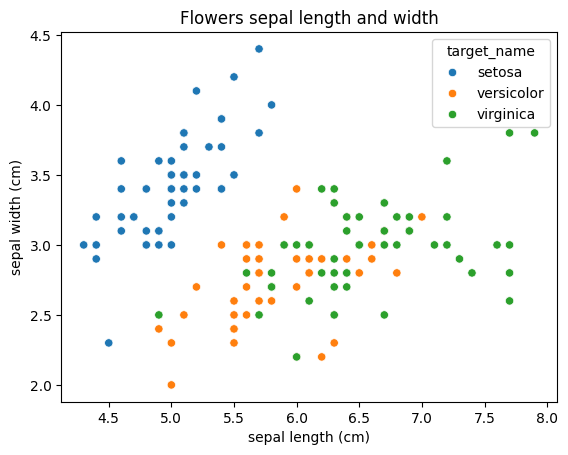

In [ ]:
sns.scatterplot(data=df,x="sepal length (cm)",y="sepal width (cm)",hue="target_name")
plt.title("Flowers sepal length and width")
plt.show()

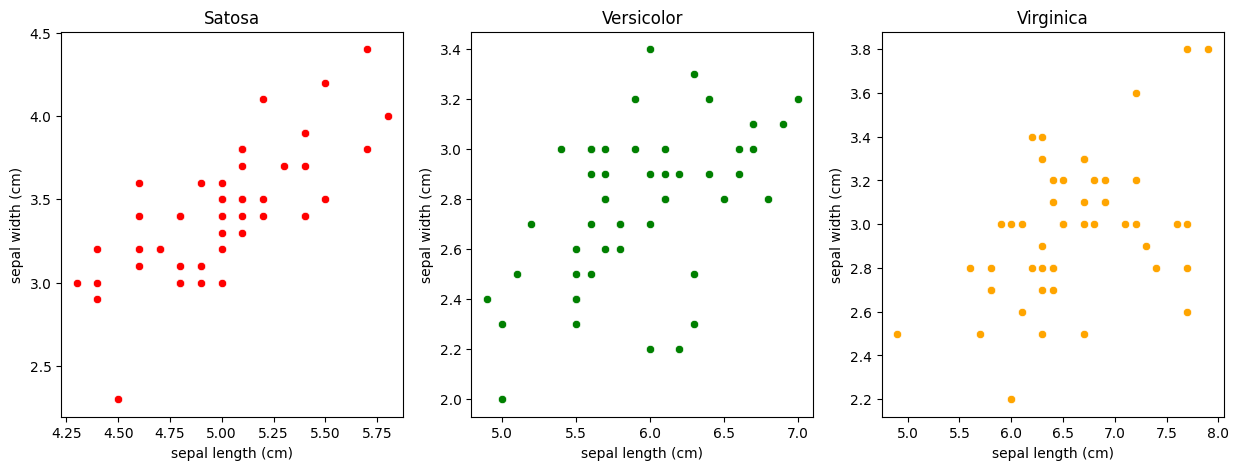

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.scatterplot(x=satosa["sepal length (cm)"],y=satosa["sepal width (cm)"],color="red")
plt.title("Satosa")
plt.subplot(1,3,2)
sns.scatterplot(x=versicolor["sepal length (cm)"],y=versicolor["sepal width (cm)"],color="green")
plt.title("Versicolor")
plt.subplot(1,3,3)
sns.scatterplot(x=virginica["sepal length (cm)"],y=virginica["sepal width (cm)"],color="orange")
plt.title("Virginica")
plt.show()

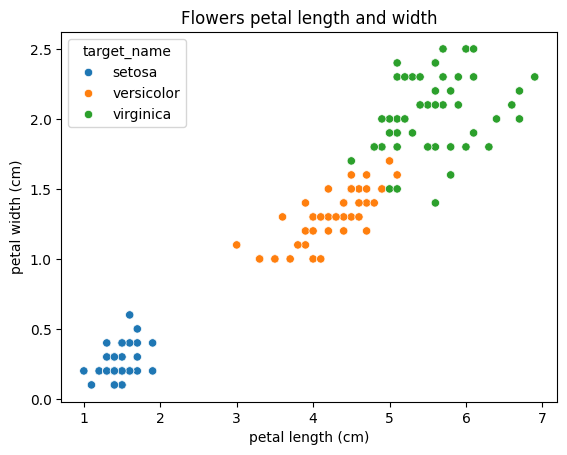

In [ ]:
sns.scatterplot(x=df["petal length (cm)"],y=df["petal width (cm)"],hue=df["target_name"])
plt.title("Flowers petal length and width")
plt.show()

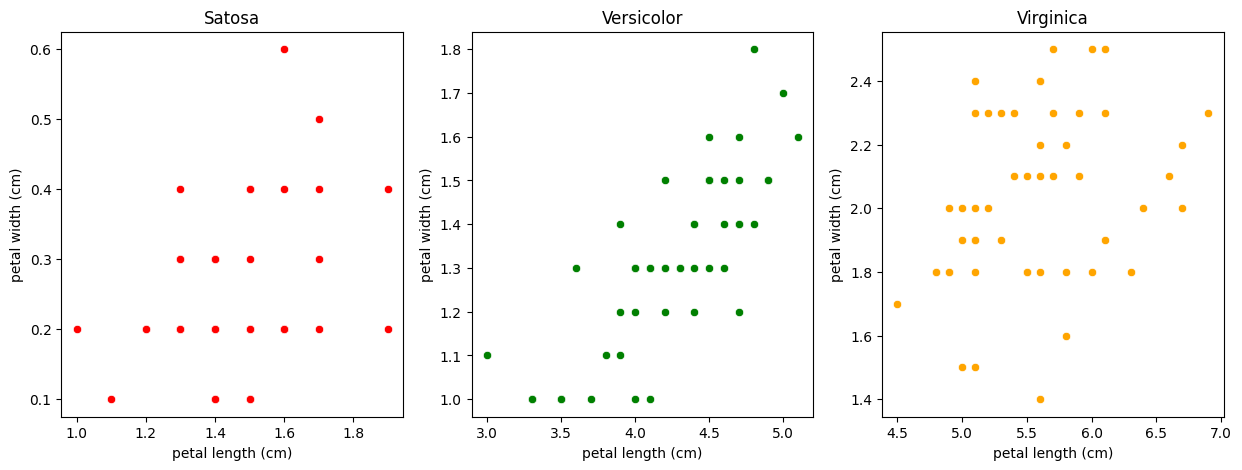

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.scatterplot(x=satosa["petal length (cm)"],y=satosa["petal width (cm)"],color="red")
plt.title("Satosa")
plt.subplot(1,3,2)
sns.scatterplot(x=versicolor["petal length (cm)"],y=versicolor["petal width (cm)"],color="green")
plt.title("Versicolor")
plt.subplot(1,3,3)
sns.scatterplot(x=virginica["petal length (cm)"],y=virginica["petal width (cm)"],color="orange")
plt.title("Virginica")
plt.show()

In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [ ]:
x=df.drop(columns=["target_name","target"])
y=df["target"]

In [ ]:
x.shape,y.shape

((150, 4), (150,))

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=23)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [ ]:
knn=KNeighborsClassifier()

In [ ]:
parameter={
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

cv= ShuffleSplit(n_splits=5,test_size=0.2,random_state=9)
grid_search=GridSearchCV(estimator=knn,param_grid=parameter,cv=5)
grid_search.fit(x_train,y_train)
print(f"best parameter is : {grid_search.best_params_}")
print(f" best score is : {grid_search.best_score_}")

best parameter is : {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
 best score is : 0.9666666666666668


In [ ]:
knn=KNeighborsClassifier(metric='manhattan',n_neighbors=9,weights="uniform")
knn.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=9)

In [ ]:
knn.score(x_train,y_train),knn.score(x_test,y_test)

(0.9583333333333334, 1.0)

In [ ]:

cv_score=(cross_val_score(knn,x_train,y_train,cv=5))
print(f"scores are :{cv_score}")
print(f"mean score is :{cv_score.mean()}")

scores are :[0.95833333 0.95833333 1.         0.95833333 0.95833333]
mean score is :0.9666666666666668


In [ ]:
y_pred=knn.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  0, 10]])

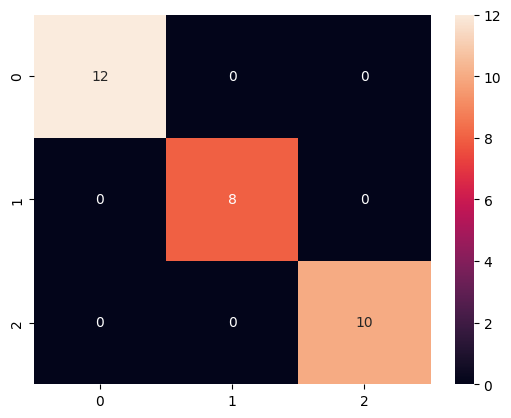

In [ ]:
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
def prediction(sl,sw,pl,pw):
   a= knn.predict([[sl,sw,pl,pw]])
   if a==0:
      print("satosa")
   elif a==1:
      print("versicolor")
   else:
      print("Virginica")

In [ ]:
prediction(1.3,1.2,0.2,1.2)

satosa
